In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [39]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

<h1>Explore data</h1>

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71236 entries, 0 to 71235
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   encounter_id                           71236 non-null  int64 
 1   country                                71236 non-null  object
 2   patient_id                             71236 non-null  int64 
 3   race                                   67682 non-null  object
 4   gender                                 71236 non-null  object
 5   age                                    67679 non-null  object
 6   weight                                 71236 non-null  object
 7   payer_code                             71236 non-null  object
 8   outpatient_visits_in_previous_year     71236 non-null  int64 
 9   emergency_visits_in_previous_year      71236 non-null  int64 
 10  inpatient_visits_in_previous_year      71236 non-null  int64 
 11  admission_type 

In [41]:
df_train.replace('?', np.nan, inplace = True)
df_train.replace('Not Mapped', np.nan, inplace = True)

In [42]:
#repeat for test data
df_test.replace('?', np.nan, inplace = True)
df_test.replace('Not Mapped', np.nan, inplace = True)

In [43]:
#Get the amount of empty values
df_train.isna().sum()

encounter_id                                 0
country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3920
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     3269
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_dia

In [44]:
df_train['country'].unique().sum()
#there is only one country, so we will drop the country column
df_train = df_train.drop('country', axis=1)

In [45]:
#repeat for test data
df_test['country'].unique().sum()
#there is only one country, so we will drop the country column
df_test = df_train.drop('country', axis=1)

KeyError: "['country'] not found in axis"

In [46]:
df_train.head(2)

encounter_id  patient_id             race  gender      age weight  \
0        533253       70110        Caucasian  Female  [70-80)    NaN   
1        426224    29775006  AfricanAmerican    Male  [50-60)    NaN   

  payer_code  outpatient_visits_in_previous_year  \
0        NaN                                   0   
1        NaN                                   0   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  ...  \
0                                  0                                  2  ...   
1                                  0                                  0  ...   

  secondary_diagnosis additional_diagnosis  number_diagnoses  \
0                 276                  466                 8   
1                 785                  162                 9   

  glucose_test_result a1c_test_result  change_in_meds_during_hospitalization  \
0                 NaN             NaN                                     No   
1                 NaN             NaN                                     No   

   prescribed_diabetes_meds   medication  readmitted_binary  \
0                        No           []                 No   
1                       Yes  ['insulin']                 No   

  readmitted_multiclass  
0              >30 days  
1                    No  

[2 rows x 30 columns]

In [47]:
#making target variable numerical
df_train['readmitted_binary'] = df_train['readmitted_binary'].replace({'Yes': 1, 'No': 0}).astype(int)
#binary encoding of gender
df_train['gender'] = df_train['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)

#one hot encoding for race
encoder_race = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_race.fit_transform(df_train['race'].values.reshape(-1, 1))

#concatenate the one-hot encoded df with df_test
df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_race.get_feature_names_out(['race']))], axis=1)

In [48]:
#repeat for test data 
df_test['readmitted_binary'] = df_test['readmitted_binary'].replace({'Yes': 1, 'No': 0}).astype(int)
#binary encoding of gender
df_test['gender'] = df_test['gender'].replace({'Female': 1, 'Male': 0, 'Unknown/Invalid': np.nan}).astype(float)

#one hot encoding for race
encoder_race = OneHotEncoder(sparse_output = False, drop='first')
one_hot_encoded = encoder_race.fit_transform(df_test['race'].values.reshape(-1, 1))

#concatenate the one-hot encoded df with df_test
df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_race.get_feature_names_out(['race']))], axis=1)

KeyError: 'readmitted_binary'

In [ ]:
#one hot encoding for payer_code
encoder_payer_code = OneHotEncoder(sparse_output= False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_train['payer_code'].values.reshape(-1,1))

df_train = pd.concat([df_train, pd.DataFrame(one_hot_encoded, columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis = 1)

In [ ]:
#repeat for test data 
#one hot encoding for payer_code
encoder_payer_code = OneHotEncoder(sparse_output= False, drop='first')
one_hot_encoded = encoder_payer_code.fit_transform(df_test['payer_code'].values.reshape(-1,1))

df_test = pd.concat([df_test, pd.DataFrame(one_hot_encoded, columns=encoder_payer_code.get_feature_names_out(['payer_code']))], axis = 1)

In [ ]:
df_train['medical_specialty'].value_counts()


InternalMedicine                 10292
Emergency/Trauma                  5319
Family/GeneralPractice            5217
Cardiology                        3716
Surgery-General                   2144
                                 ...  
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Pediatrics-EmergencyMedicine         1
Neurophysiology                      1
Name: medical_specialty, Length: 68, dtype: int64

In [ ]:
#half the values are missing for the medical specialty 
df_train['medical_specialty'].isna().mean() 

0.49022965916109834

In [ ]:
df_train['medical_specialty'].fillna('Not Available', inplace=True)

In [ ]:
#repeat for test data
df_test['medical_specialty'].fillna('Not Available', inplace=True)

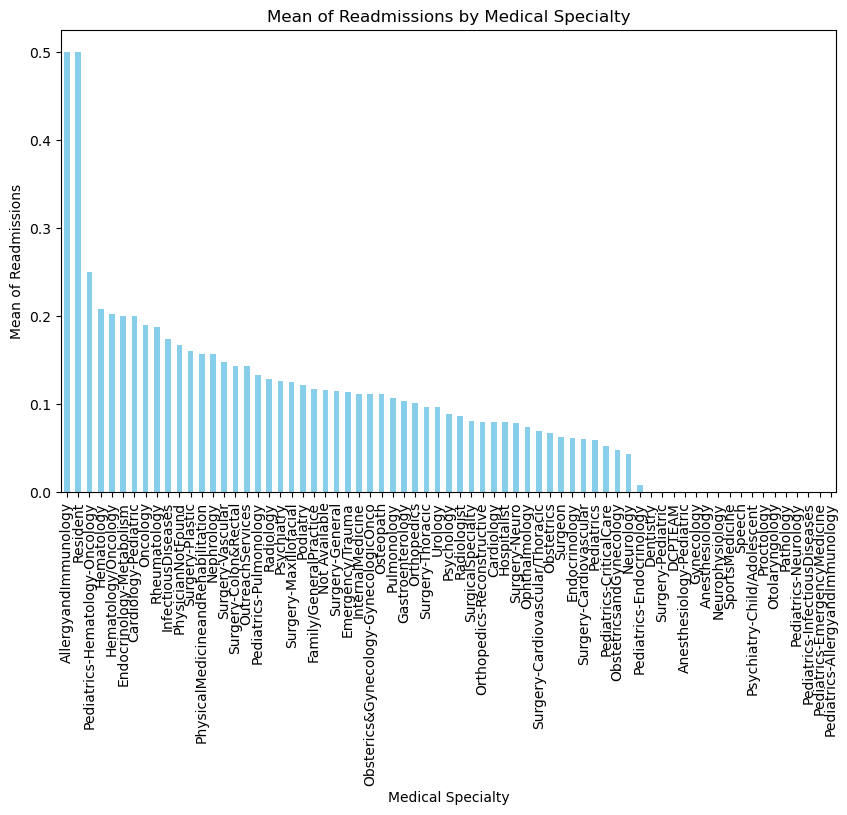

In [ ]:
grouped_data = df_train.groupby('medical_specialty')['readmitted_binary'].mean()

import matplotlib.pyplot as plt

# Sort specialties based on mean values
sorted_data = grouped_data.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='bar', color='skyblue')
plt.title('Mean of Readmissions by Medical Specialty')
plt.ylabel('Mean of Readmissions')
plt.xlabel('Medical Specialty')
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)

cnt = df_train[['encounter_id','medical_specialty']].groupby(by = 'medical_specialty').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','medical_specialty']].groupby(by = 'medical_specialty').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)


encounter_id  readmitted_binary
medical_specialty                                                    
AllergyandImmunology                             6           0.500000
Resident                                         2           0.500000
Pediatrics-Hematology-Oncology                   4           0.250000
Hematology                                      53           0.207547
Hematology/Oncology                            153           0.202614
Cardiology-Pediatric                             5           0.200000
Endocrinology-Metabolism                         5           0.200000
Oncology                                       243           0.189300
Rheumatology                                    16           0.187500
InfectiousDiseases                              23           0.173913
PhysicianNotFound                                6           0.166667
Surgery-Plastic                                 25           0.160000
PhysicalMedicineandRehabilitation              280           0.157143
Nephrology                                    1136           0.156690
Surgery-Vascular                               365           0.147945
Surgery-Colon&Rectal                             7           0.142857
OutreachServices                                 7           0.142857
Pediatrics-Pulmonology                          15           0.133333
Radiology                                       39           0.128205
Psychiatry                                     598           0.125418
Surgery-Maxillofacial                            8           0.125000
Podiatry                                        74           0.121622
Family/GeneralPractice                        5217           0.117117
Not Available                                34922           0.115858
Surgery-General                               2144           0.114739
Emergency/Trauma                              5319           0.113179
InternalMedicine                             10292           0.111543
Obsterics&Gynecology-GynecologicOnco            18           0.111111
Osteopath                                       27           0.111111
Pulmonology                                    611           0.106383
Gastroenterology                               397           0.103275
Orthopedics                                    954           0.100629
Surgery-Thoracic                                83           0.096386
Urology                                        478           0.096234
Psychology                                      68           0.088235
Radiologist                                    817           0.085679
SurgicalSpecialty                               25           0.080000
Orthopedics-Reconstructive                     867           0.079585
Cardiology                                    3716           0.079386
Hospitalist                                     38           0.078947
Surgery-Neuro                                  320           0.078125
Ophthalmology                                   27           0.074074
Surgery-Cardiovascular/Thoracic                464           0.068966
Obstetrics                                      15           0.066667
Surgeon                                         32           0.062500
Endocrinology                                   81           0.061728
Surgery-Cardiovascular                          67           0.059701
Pediatrics                                     186           0.059140
Pediatrics-CriticalCare                         57           0.052632
ObstetricsandGynecology                        468           0.047009
Neurology                                      138           0.043478
Pediatrics-Endocrinology                       121           0.008264
Pediatrics-Neurology                             8           0.000000
Speech                                           1           0.000000
SportsMedicine                                   1           0.000000
Proctology                                      

In [ ]:
pd.set_option('display.max_rows', None)

cnt = df_test[['encounter_id','medical_specialty']].groupby(by = 'medical_specialty').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_test[['readmitted_binary','medical_specialty']].groupby(by = 'medical_specialty').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)


KeyError: "['readmitted_binary'] not in index"

In [ ]:
df_train['allergy_or_resident'] = df_train['medical_specialty'].apply(lambda x: 
                                                                              1 if (x == 'AllergyAndImmunology'
                                                                                   or x == 'Resident')
                                                                              else 0) #highest readmission_binary
                                                                              
df_train['no_medical_specialty'] = df_train['medical_specialty'].apply(lambda x: 1 if x == 'Not Available' else 0) #most values are here, does this make sense? 

df_train['mid_medical_specialty'] = df_train['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Hematology-Oncology'
                                                                                   or x == 'Hematology'
                                                                                   or x == 'Hematology/Oncology'
                                                                                   or x == 'Cardiology-Pediatric'
                                                                                   or x == 'Oncology'
                                                                                   or x == 'Rheumatology'
                                                                                   or x == 'InfectiousDiseases'
                                                                                   or x == 'PhysicianNotFound'
                                                                                   or x == 'Surgery-Plastic'
                                                                                   or x == 'PhysicalMedicineandRehabilitation'
                                                                                   or x == 'Nephrology'
                                                                                   or x == 'Surgery-Vascular'
                                                                                   or x == 'Surgery-Colon&Rectal'
                                                                                   or x == 'OutreachServices'
                                                                                   ) else 0)

df_train['lower_medical_specialty'] = df_train['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Pulmonology'
                                                                                   or x == 'Radiology'
                                                                                   or x == 'Psychiatry'
                                                                                   or x == 'Surgery-Maxillofacial'
                                                                                   or x == 'Podiatry'
                                                                                   or x == 'Family/GeneralPractice'
                                                                                   or x == 'Surgery-General'
                                                                                   or x == 'Emergency/Trauma' 
                                                                                   or x == 'InternalMedicine'
                                                                                   or x == 'Pulmonology'
                                                                                   or x == 'Gastroenterology'
                                                                                   or x == 'Orthopedics'
                                                                                   or x == 'Urology'
                                                                                   or x == 'Radiologist'
                                                                                   or x == 'Orthopedics-Reconstructive'
                                                                                   or x == 'Cardiology'
                                                                                   or x == 'Surgery-Neuro'
                                                                                   or x == 'Surgery-Cardiovascular/Thoracic'
                                                                                   or x == 'Pediatrics'
                                                                                   or x == 'ObstetricsandGynecology'
                                                                                   or x == 'Neurology'
                                                                                   ) else 0)       
                                                                                                                                       

df_train['pediatrics_endocrinology'] = df_train['medical_specialty'].apply(lambda x: 
                                                                      1 if x == 'Pediatrics-Endocrinology' else 0) #lowest value, too far from the others

df_train['other_medical_specialty'] = df_train['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Neurology'
                                                                                   or x == 'Gynecology'
                                                                                   or x == 'Anesthesiology-Pediatric'
                                                                                   or x == 'Pathology'
                                                                                   or x == 'Otolaryngology') else 0) #value as zero


In [ ]:
#repeat for test data
df_test['allergy_or_resident'] = df_train['medical_specialty'].apply(lambda x: 
                                                                              1 if (x == 'AllergyAndImmunology'
                                                                                   or x == 'Resident')
                                                                              else 0) #highest readmission_binary
                                                                              
df_test['no_medical_specialty'] = df_test['medical_specialty'].apply(lambda x: 1 if x == 'Not Available' else 0) #most values are here, does this make sense? 

df_test['mid_medical_specialty'] = df_test['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Hematology-Oncology'
                                                                                   or x == 'Hematology'
                                                                                   or x == 'Hematology/Oncology'
                                                                                   or x == 'Cardiology-Pediatric'
                                                                                   or x == 'Oncology'
                                                                                   or x == 'Rheumatology'
                                                                                   or x == 'InfectiousDiseases'
                                                                                   or x == 'PhysicianNotFound'
                                                                                   or x == 'Surgery-Plastic'
                                                                                   or x == 'PhysicalMedicineandRehabilitation'
                                                                                   or x == 'Nephrology'
                                                                                   or x == 'Surgery-Vascular'
                                                                                   or x == 'Surgery-Colon&Rectal'
                                                                                   or x == 'OutreachServices'
                                                                                   ) else 0)

df_test['lower_medical_specialty'] = df_test['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Pulmonology'
                                                                                   or x == 'Radiology'
                                                                                   or x == 'Psychiatry'
                                                                                   or x == 'Surgery-Maxillofacial'
                                                                                   or x == 'Podiatry'
                                                                                   or x == 'Family/GeneralPractice'
                                                                                   or x == 'Surgery-General'
                                                                                   or x == 'Emergency/Trauma' 
                                                                                   or x == 'InternalMedicine'
                                                                                   or x == 'Pulmonology'
                                                                                   or x == 'Gastroenterology'
                                                                                   or x == 'Orthopedics'
                                                                                   or x == 'Urology'
                                                                                   or x == 'Radiologist'
                                                                                   or x == 'Orthopedics-Reconstructive'
                                                                                   or x == 'Cardiology'
                                                                                   or x == 'Surgery-Neuro'
                                                                                   or x == 'Surgery-Cardiovascular/Thoracic'
                                                                                   or x == 'Pediatrics'
                                                                                   or x == 'ObstetricsandGynecology'
                                                                                   or x == 'Neurology'
                                                                                   ) else 0)       
                                                                                                                                       

df_test['pediatrics_endocrinology'] = df_test['medical_specialty'].apply(lambda x: 
                                                                      1 if x == 'Pediatrics-Endocrinology' else 0) #lowest value, too far from the others

df_test['other_medical_specialty'] = df_test['medical_specialty'].apply(lambda x: 
                                                                      1 if (x == 'Pediatrics-Neurology'
                                                                                   or x == 'Gynecology'
                                                                                   or x == 'Anesthesiology-Pediatric'
                                                                                   or x == 'Pathology'
                                                                                   or x == 'Otolaryngology') else 0) #value as zero


In [ ]:
df_train.head()

encounter_id  patient_id             race  gender      age weight  \
0        533253       70110        Caucasian     1.0  [70-80)    NaN   
1        426224    29775006  AfricanAmerican     0.0  [50-60)    NaN   
2        634063    80729253        Caucasian     1.0  [60-70)    NaN   
3        890610     2919042  AfricanAmerican     0.0  [60-70)    NaN   
4        654194    84871971        Caucasian     1.0  [70-80)    NaN   

  payer_code  outpatient_visits_in_previous_year  \
0        NaN                                   0   
1        NaN                                   0   
2        NaN                                   0   
3         MC                                   0   
4         HM                                   1   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  ...  \
0                                  0                                  2  ...   
1                                  0                                  0  ...   
2                                  0                                  1  ...   
3                                  0                                  1  ...   
4                                  0                                  0  ...   

  payer_code_SP payer_code_UN  payer_code_WC payer_code_nan  \
0           0.0           0.0            0.0            1.0   
1           0.0           0.0            0.0            1.0   
2           0.0           0.0            0.0            1.0   
3           0.0           0.0            0.0            0.0   
4           0.0           0.0            0.0            0.0   

  allergy_or_resident  no_medical_specialty  mid_medical_specialty  \
0                   0                     0                      0   
1                   0                     1                      0   
2                   0                     0                      0   
3                   0                     0                      0   
4                   0                     1                      0   

   lower_medical_specialty  pediatrics_endocrinology other_medical_specialty  
0                        1                         0                       0  
1                        0                         0                       0  
2                        1                         0                       0  
3                        1                         0                       0  
4                        0                         0                       0  

[5 rows x 58 columns]

In [ ]:
cnt = df_train[['encounter_id','average_pulse_bpm']].groupby(by = 'average_pulse_bpm').count().sort_values(by = 'encounter_id', ascending=False)
mean = df_train[['readmitted_binary','average_pulse_bpm']].groupby(by = 'average_pulse_bpm').mean().sort_values(by = 'readmitted_binary', ascending=False)
pd.concat([cnt, mean], axis = 1).sort_values(by = 'readmitted_binary', ascending=False)


encounter_id  readmitted_binary
average_pulse_bpm                                 
135                         870           0.136782
68                          891           0.133558
91                          855           0.132164
70                          876           0.131279
92                          908           0.131057
122                         901           0.129856
107                         882           0.129252
125                         921           0.127036
137                         897           0.124861
69                          907           0.124587
109                         948           0.124473
108                         884           0.124434
94                          904           0.123894
75                          865           0.123699
138                         879           0.122867
61                          851           0.122209
96                          880           0.121591
71                          832           0.121394
133                         909           0.121012
126                         862           0.120650
62                          858           0.118881
120                         850           0.118824
87                          877           0.118586
84                          844           0.118483
80                          835           0.117365
139                         862           0.117169
106                         908           0.116740
119                         867           0.116494
127                         808           0.113861
111                         942           0.113588
77                          908           0.113436
65                          891           0.113356
123                         874           0.113272
79                          852           0.112676
102                         906           0.112583
66                          926           0.112311
93                          936           0.112179
97                          817           0.111383
112                         872           0.111239
131                         908           0.111233
103                         906           0.110375
76                          888           0.110360
82                          888           0.110360
86                          862           0.110209
72                          867           0.109573
89                          950           0.109474
83                          860           0.109302
104                         927           0.108954
99                          946           0.108879
98                          911           0.108672
132                         935           0.108021
74                          891           0.107744
95                          929           0.107643
81                          857           0.107351
90                          901           0.106548
73                          874           0.106407
118                         884           0.106335
67                          853           0.105510
115                         915           0.104918
101                         897           0.104794
121                         907           0.104741
129                         910           0.103297
63                          951           0.103049
85                          903           0.102990
136                         897           0.102564
128                         879           0.102389
116                         874           0.101831
134                         943           0.100742
124                         870           0.100000
113                         867           0.099193
110                         921           0.098806
114                         907           0.098126
130                         898           0.097996
64                          901           0.095450
117                         898           0.093541
60                          883           0.092865
78                          845          

In [ ]:
pd.isna(df_train['average_pulse_bpm']).value_counts() #no NaNs 

False    71236
Name: average_pulse_bpm, dtype: int64

In [ ]:
df_train['average_pulse_bpm'].max()

139

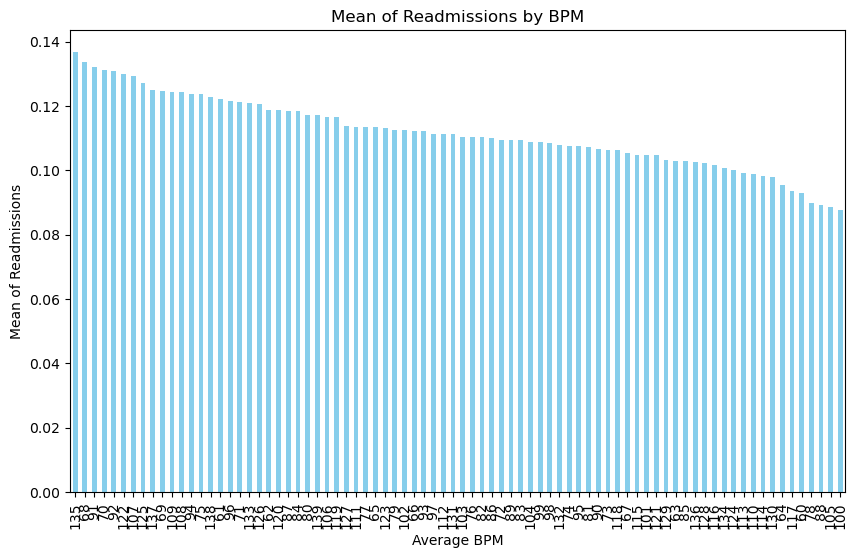

In [ ]:
grouped_data = df_train.groupby('average_pulse_bpm')['readmitted_binary'].mean()

# Sort specialties based on mean values
sorted_data = grouped_data.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='bar', color='skyblue')
plt.title('Mean of Readmissions by BPM')
plt.ylabel('Mean of Readmissions')
plt.xlabel('Average BPM')
plt.show()

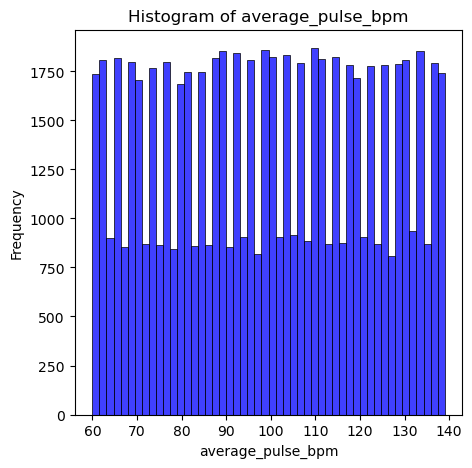

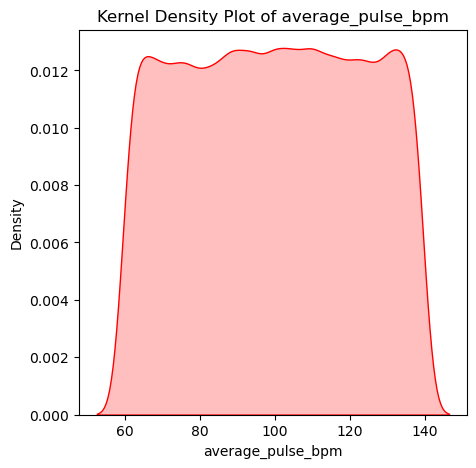

In [ ]:
#check the distribution of average_bimport seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_train is your DataFrame

# Plot a histogram
plt.figure(figsize=(5, 5))
sns.histplot(df_train['average_pulse_bpm'], bins=50, kde=False, color='blue')
plt.title('Histogram of average_pulse_bpm')
plt.xlabel('average_pulse_bpm')
plt.ylabel('Frequency')
plt.show()

# Plot a kernel density plot
plt.figure(figsize=(5, 5))
sns.kdeplot(df_train['average_pulse_bpm'], color='red', fill=True)
plt.title('Kernel Density Plot of average_pulse_bpm')
plt.xlabel('average_pulse_bpm')
plt.ylabel('Density')
plt.show()


In [ ]:
#the distribution does not seem normal, so let's use minmaxscaler
scaler = MinMaxScaler()
df_train['average_pulse_bpm_scaled'] = scaler.fit_transform(df_train[['average_pulse_bpm']])


In [ ]:
df_train.head()

encounter_id  patient_id             race  gender      age weight  \
0        533253       70110        Caucasian     1.0  [70-80)    NaN   
1        426224    29775006  AfricanAmerican     0.0  [50-60)    NaN   
2        634063    80729253        Caucasian     1.0  [60-70)    NaN   
3        890610     2919042  AfricanAmerican     0.0  [60-70)    NaN   
4        654194    84871971        Caucasian     1.0  [70-80)    NaN   

  payer_code  outpatient_visits_in_previous_year  \
0        NaN                                   0   
1        NaN                                   0   
2        NaN                                   0   
3         MC                                   0   
4         HM                                   1   

   emergency_visits_in_previous_year  inpatient_visits_in_previous_year  ...  \
0                                  0                                  2  ...   
1                                  0                                  0  ...   
2                                  0                                  1  ...   
3                                  0                                  1  ...   
4                                  0                                  0  ...   

  payer_code_UN payer_code_WC  payer_code_nan allergy_or_resident  \
0           0.0           0.0             1.0                   0   
1           0.0           0.0             1.0                   0   
2           0.0           0.0             1.0                   0   
3           0.0           0.0             0.0                   0   
4           0.0           0.0             0.0                   0   

  no_medical_specialty  mid_medical_specialty  lower_medical_specialty  \
0                    0                      0                        1   
1                    1                      0                        0   
2                    0                      0                        1   
3                    0                      0                        1   
4                    1                      0                        0   

   pediatrics_endocrinology  other_medical_specialty average_pulse_bpm_scaled  
0                         0                        0                 0.848101  
1                         0                        0                 0.860759  
2                         0                        0                 0.430380  
3                         0                        0                 0.265823  
4                         0                        0                 0.835443  

[5 rows x 59 columns]

In [ ]:
df_train['discharge_disposition']

0                                       Discharged to home
1        Discharged/transferred to a federal health car...
2                                       Discharged to home
3                                       Discharged to home
4        Discharged/transferred to home with home healt...
5                                       Discharged to home
6                                       Discharged to home
7        Discharged/transferred to home with home healt...
8                                       Discharged to home
9                                       Discharged to home
10                                      Discharged to home
11                           Discharged/transferred to SNF
12                                      Discharged to home
13                                      Discharged to home
14                              Hospice / medical facility
15                                      Discharged to home
16                                      Discharged to ho